### <center>MUHAMMAD ARIE BINTANG SARAGIH</center>
#### <center>F1D22320014</center>

# MODUL 4 PERBAIKAN KUALITAS CITRA DAN DETEKSI TEPI

Memperbaiki Kualitas Citra Dengan Kernel 3x3 1/9 dan 9x9 1/81 Menggunakan Metode Mean, Median dan Modus

Berikut merupakan library yang akan kita gunakan pada praktikum kali ini. NumPy (alias np) digunakan untuk operasi numerik dan manipulasi array, sementara OpenCV (cv2) adalah pustaka yang menyediakan berbagai fungsi untuk pengolahan gambar, termasuk pemrosesan, deteksi objek, dan lainnya. Matplotlib (plt) digunakan untuk visualisasi data, termasuk plot gambar dan grafik.

In [81]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Defenisi Fungsi Untuk Melakukan Perbaikan Kualitas Citra

In [82]:
def mean_3x3(image):
    height, width = image.shape
    result = np.zeros((height, width), dtype=np.uint8)
    
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            sum = 0
            for k in range(-1, 2):
                for l in range(-1, 2):
                    sum += image[i + k, j + l]
            result[i, j] = sum // 9
            
    return result

def median_3x3(image):
    height, width = image.shape
    result = np.zeros((height, width), dtype=np.uint8)
    
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            neighbors = []
            for k in range(-1, 2):
                for l in range(-1, 2):
                    neighbors.append(image[i + k, j + l])
            neighbors.sort()
            result[i, j] = neighbors[4]
            
    return result

def modus_3x3(image):
    height, width = image.shape
    result = np.zeros((height, width), dtype=np.uint8)
    
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            count = np.zeros(256, dtype=int)
            for k in range(-1, 2):
                for l in range(-1, 2):
                    count[image[i + k, j + l]] += 1
            result[i, j] = np.argmax(count)
            
    return result

Mean_3x3(image) menggunakan filter rata-rata 3x3, berfungsi untuk menghaluskan gambar. Dengan menggunakan nested loops, fungsi ini mengunjungi setiap piksel dalam gambar dan menghitung rata-rata dari nilai piksel di sekitarnya yang membentuk matriks 3x3. Hasilnya adalah gambar yang telah disaring dengan meratakan nilai piksel di sekitar setiap titik. 

Fungsi median_3x3(image) melaksanakan filter median 3x3, yang berguna untuk mengurangi noise dalam gambar. Dengan cara serupa, fungsi ini juga mengiterasi melalui setiap piksel dalam gambar, tetapi kali ini mengurutkan nilai piksel di sekitarnya yang membentuk matriks 3x3 dan mengambil nilai tengah (median) sebagai representasi piksel baru.

Fungsi modus_3x3(image) melakukan filter modus 3x3, yang menghasilkan gambar dengan mempertahankan piksel yang paling sering muncul dalam setiap jendela 3x3. Ini berguna dalam menghilangkan noise dan menjaga detail gambar. Dengan menghitung kemunculan nilai piksel di sekitarnya, fungsi ini menetapkan nilai piksel yang paling sering muncul di tengah jendela sebagai piksel baru dalam gambar yang difilter.

In [83]:
def mean_9x9(image):
    height, width = image.shape
    result = np.zeros((height, width), dtype=np.uint8)
    
    for i in range(4, height - 4):
        for j in range(4, width - 4):
            sum = 0
            for k in range(-4, 5):
                for l in range(-4, 5):
                    sum += image[i + k, j + l]
            result[i, j] = sum // 81
            
    return result

def median_9x9(image):
    height, width = image.shape
    result = np.zeros((height, width), dtype=np.uint8)
    
    for i in range(4, height - 4):
        for j in range(4, width - 4):
            neighbors = []
            for k in range(-4, 5):
                for l in range(-4, 5):
                    neighbors.append(image[i + k, j + l])
            neighbors.sort()
            result[i, j] = neighbors[40]  
            
    return result

def modus_9x9(image):
    height, width = image.shape
    result = np.zeros((height, width), dtype=np.uint8)
    
    for i in range(4, height - 4):
        for j in range(4, width - 4):
            count = np.zeros(256, dtype=int)
            for k in range(-4, 5):
                for l in range(-4, 5):
                    count[image[i + k, j + l]] += 1
            result[i, j] = np.argmax(count) 
            
    return result


Fungsi -  fungsi ini sama dengan fungsi yang diatas sebelumnya, perbedaan nya hanya ada pada kernel yang digunakan.

In [102]:
def sharpening(image):
    
    kernel = np.array([[1/10, 1/10, 1/10],
                    [1/10, 1/5, 1/10],
                    [1/10, 1/10, 1/10]])
    
    height, width = image.shape
    
    sharpened_image = np.zeros((height, width), dtype=np.uint8)
    
    for i in range(1, height-1):
        for j in range(1, width-1):
            pixel_value = (kernel[0][0] * image[i-1][j-1] + kernel[0][1] * image[i-1][j] + kernel[0][2] * image[i-1][j+1] +
                           kernel[1][0] * image[i][j-1]   + kernel[1][1] * image[i][j]   + kernel[1][2] * image[i][j+1] +
                           kernel[2][0] * image[i+1][j-1] + kernel[2][1] * image[i+1][j] + kernel[2][2] * image[i+1][j+1])
            
            pixel_value = max(0, min(pixel_value, 255))
            
            sharpened_image[i][j] = pixel_value
            
    return sharpened_image

def smoothing(image):
    
    kernel = np.array([[1/10, 1/10, 1/10],
                    [1/10, 1/5, 1/10],
                    [1/10, 1/10, 1/10]])
    
    height, width = image.shape
    
    smoothed_image = np.zeros((height, width), dtype=np.uint8)
    
    for i in range(1, height-1):
        for j in range(1, width-1):
            pixel_value = (kernel[0][0] * image[i-1][j-1] + kernel[0][1] * image[i-1][j] + kernel[0][2] * image[i-1][j+1] +
                           kernel[1][0] * image[i][j-1]   + kernel[1][1] * image[i][j]   + kernel[1][2] * image[i][j+1] +
                           kernel[2][0] * image[i+1][j-1] + kernel[2][1] * image[i+1][j] + kernel[2][2] * image[i+1][j+1])
            
            pixel_value = max(0, min(pixel_value, 255))
            
            smoothed_image[i][j] = pixel_value
            
    return smoothed_image



Fungsi sharpening() bertujuan untuk melakukan operasi sharpening pada sebuah citra grayscale. Proses sharpening dilakukan dengan menerapkan filter kernel yang telah ditentukan pada setiap piksel citra. Filter kernel yang digunakan adalah kernel dengan nilai tertentu yang digunakan untuk melakukan konvolusi dengan citra. Setelah nilai konvolusi dihitung untuk setiap piksel, nilai tersebut diaplikasikan kembali ke piksel tersebut. Proses tersebut dilakukan untuk setiap piksel dalam citra kecuali piksel di pinggir citra karena filter kernel membutuhkan nilai dari piksel tetangga. Hasil akhir dari proses tersebut adalah citra yang lebih tajam atau lebih "sharpened" daripada citra aslinya.

Fungsi smoothing() bertujuan untuk melakukan operasi smoothing atau pemulusan pada sebuah citra grayscale. Proses smoothing dilakukan dengan menerapkan filter kernel yang telah ditentukan pada setiap piksel citra. Filter kernel yang digunakan adalah kernel dengan nilai tertentu yang digunakan untuk melakukan konvolusi dengan citra. Setelah nilai konvolusi dihitung untuk setiap piksel, nilai tersebut diaplikasikan kembali ke piksel tersebut. Proses tersebut dilakukan untuk setiap piksel dalam citra kecuali piksel di pinggir citra karena filter kernel membutuhkan nilai dari piksel tetangga. Hasil akhir dari proses tersebut adalah citra yang lebih halus atau lebih "smoothed" daripada citra aslinya.

# Menampilkan hasil dari perbaikan citra

In [103]:
image = cv2.imread('../assets/manchester_united.jpeg', 0)

hasilMean3x3 = mean_3x3(image)
hasilMedian3x3 = median_3x3(image)
hasilModus3x3 = modus_3x3(image)
hasilMean9x9 = mean_9x9(image)
hasilMedian9x9 = median_9x9(image)
hasilModus9x9 = modus_9x9(image)
sharp = sharpening(image)
smooth = smoothing(image)


Fungsi-fungsi di panggil menggunakan parameter image, dan disimpan kedalam sebuah variabel.

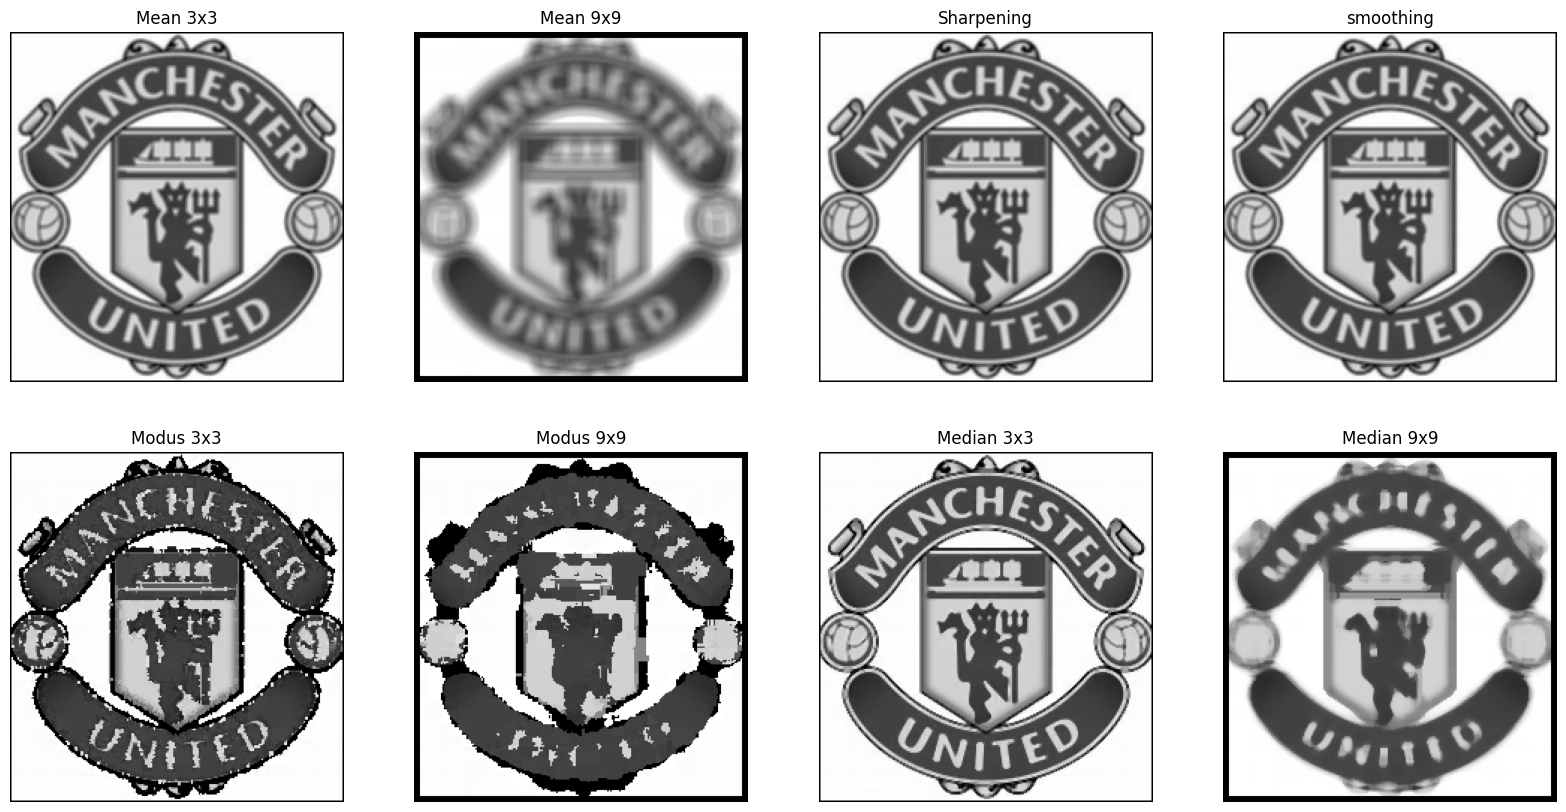

In [104]:

plt.figure(figsize=(20,10))

plt.subplot(2, 4, 1)
plt.imshow(hasilMean3x3, cmap='gray')
plt.title('Mean 3x3')
plt.axis("off")

plt.subplot(2, 4, 2)
plt.imshow(hasilMean9x9, cmap='gray')
plt.title('Mean 9x9')
plt.axis("off")

plt.subplot(2, 4, 3)
plt.imshow(sharp, cmap='gray')
plt.title('Sharpening')
plt.axis("off")

plt.subplot(2, 4, 4)
plt.imshow(smooth, cmap='gray')
plt.title('smoothing')
plt.axis("off")

plt.subplot(2, 4, 5)
plt.imshow(hasilModus3x3, cmap='gray')
plt.title('Modus 3x3')
plt.axis("off")

plt.subplot(2, 4, 6)
plt.imshow(hasilModus9x9, cmap='gray')
plt.title('Modus 9x9')
plt.axis("off")

plt.subplot(2, 4, 7)
plt.imshow(hasilMedian3x3, cmap='gray')
plt.title('Median 3x3')
plt.axis("off")

plt.subplot(2, 4, 8)
plt.imshow(hasilMedian9x9, cmap='gray')
plt.title('Median 9x9')
plt.axis("off")

plt.show()

# Melakukan Deteksi Tepi Menggunakan Metode Prewitt,Sobel dan Roberts

# 1. Prewitt

In [105]:
def metodePrewitt(image):
    height, width = image.shape

    edges = np.zeros((height, width))
    prewitt_horizontal = np.array([[-1, -1, -1],
                                [0, 0, 0],
                                [1, 1, 1]])

    prewitt_vertical = np.array([[-1, 0, 1],
                                [-1, 0, 1],
                                [-1, 0, 1]])

    for i in range(1, height-1):
        for j in range(1, width-1):
            horizontal_gradient = (image[i-1, j-1] * prewitt_horizontal[0, 0] +
                                   image[i-1, j] * prewitt_horizontal[0, 1] +
                                   image[i-1, j+1] * prewitt_horizontal[0, 2] +
                                   image[i, j-1] * prewitt_horizontal[1, 0] +
                                   image[i, j] * prewitt_horizontal[1, 1] +
                                   image[i, j+1] * prewitt_horizontal[1, 2] +
                                   image[i+1, j-1] * prewitt_horizontal[2, 0] +
                                   image[i+1, j] * prewitt_horizontal[2, 1] +
                                   image[i+1, j+1] * prewitt_horizontal[2, 2])
            edges[i, j] = abs(horizontal_gradient)

    for i in range(1, height-1):
        for j in range(1, width-1):
            vertical_gradient = (image[i-1, j-1] * prewitt_vertical[0, 0] +
                                 image[i-1, j] * prewitt_vertical[0, 1] +
                                 image[i-1, j+1] * prewitt_vertical[0, 2] +
                                 image[i, j-1] * prewitt_vertical[1, 0] +
                                 image[i, j] * prewitt_vertical[1, 1] +
                                 image[i, j+1] * prewitt_vertical[1, 2] +
                                 image[i+1, j-1] * prewitt_vertical[2, 0] +
                                 image[i+1, j] * prewitt_vertical[2, 1] +
                                 image[i+1, j+1] * prewitt_vertical[2, 2])
            edges[i, j] = max(edges[i, j], abs(vertical_gradient))

    return edges


Metode Prewitt adalah salah satu metode yang umum digunakan dalam pengolahan citra untuk mendeteksi tepi. Program tersebut menerima sebuah citra sebagai input dan menghasilkan citra yang menunjukkan tepi yang terdeteksi. Pertama-tama, program menginisialisasi matriks yang akan menyimpan hasil deteksi tepi. Kemudian, program mendefinisikan kernel atau matriks Prewitt untuk deteksi tepi horizontal dan vertikal. Selanjutnya, program melakukan iterasi melalui setiap piksel dalam citra kecuali pinggiran, dan untuk setiap piksel, program menghitung gradien tepi horizontal dan vertikal dengan mengalikan nilai piksel dan matriks Prewitt secara bersesuaian. Setelah itu, program menghitung magnitudo gradien tepi dengan menggunakan akar kuadrat dari jumlah kuadrat gradien horizontal dan vertikal untuk setiap piksel. Hasilnya disimpan dalam matriks hasil deteksi tepi. Proses ini menghasilkan citra yang menyoroti garis tepi dalam citra input, di mana nilai yang lebih tinggi menunjukkan adanya perubahan intensitas yang tajam, yang sering kali menandakan adanya tepi dalam citra.

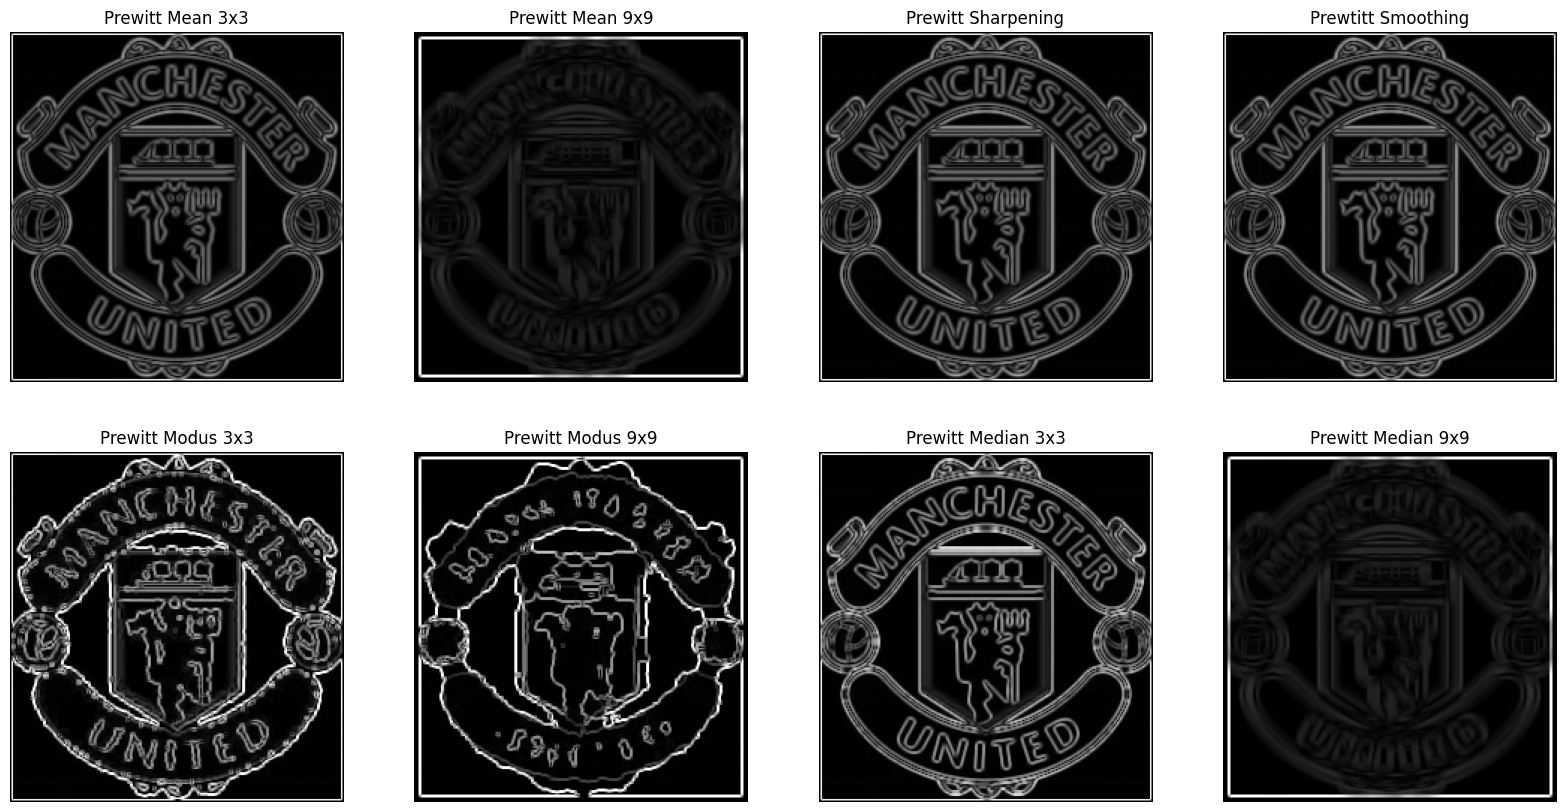

In [106]:
prewitMean3x3 = metodePrewitt(hasilMean3x3)
prewitMedian3x3 = metodePrewitt(hasilMedian3x3)
prewitModus3x3 = metodePrewitt(hasilModus3x3)
prewitMean9x9 = metodePrewitt(hasilMean9x9)
prewitMedian9x9 = metodePrewitt(hasilMedian9x9)
prewitModus9x9 = metodePrewitt(hasilModus9x9)
prewitSharp = metodePrewitt(sharp)
prewitSmooth = metodePrewitt(smooth)


plt.figure(figsize=(20,10))

plt.subplot(2, 4, 1)
plt.imshow(prewitMean3x3, cmap='gray')
plt.title('Prewitt Mean 3x3')
plt.axis("off")

plt.subplot(2, 4, 2)
plt.imshow(prewitMean9x9, cmap='gray')
plt.title('Prewitt Mean 9x9')
plt.axis("off")

plt.subplot(2, 4, 3)
plt.imshow(prewitSharp, cmap='gray')
plt.title('Prewitt Sharpening')
plt.axis("off")

plt.subplot(2, 4, 4)
plt.imshow(prewitSmooth, cmap='gray')
plt.title('Prewtitt Smoothing')
plt.axis("off")

plt.subplot(2, 4, 5)
plt.imshow(prewitModus3x3, cmap='gray')
plt.title('Prewitt Modus 3x3')
plt.axis("off")

plt.subplot(2, 4, 6)
plt.imshow(prewitModus9x9, cmap='gray')
plt.title('Prewitt Modus 9x9')
plt.axis("off")

plt.subplot(2, 4, 7)
plt.imshow(prewitMedian3x3, cmap='gray')
plt.title('Prewitt Median 3x3')
plt.axis("off")

plt.subplot(2, 4, 8)
plt.imshow(prewitMean9x9, cmap='gray')
plt.title('Prewitt Median 9x9')
plt.axis("off")

plt.show()

# 2. Sobel

In [107]:
def metodeSobel(image):
    height, width = image.shape

    edges = np.zeros((height, width))
    sobel_horizontal = np.array([[-1, -2, -1],
                                [0, 0, 0],
                                [1, 2, 1]])

    sobel_vertical = np.array([[-1, 0, 1],
                                [-2, 0, 2],
                                [-1, 0, 1]])

    for i in range(1, height-1):
        for j in range(1, width-1):
            horizontal_gradient = (image[i-1, j-1] * sobel_horizontal[0, 0] +
                                   image[i-1, j] * sobel_horizontal[0, 1] +
                                   image[i-1, j+1] * sobel_horizontal[0, 2] +
                                   image[i, j-1] * sobel_horizontal[1, 0] +
                                   image[i, j] * sobel_horizontal[1, 1] +
                                   image[i, j+1] * sobel_horizontal[1, 2] +
                                   image[i+1, j-1] * sobel_horizontal[2, 0] +
                                   image[i+1, j] * sobel_horizontal[2, 1] +
                                   image[i+1, j+1] * sobel_horizontal[2, 2])
            edges[i, j] = abs(horizontal_gradient)

    for i in range(1, height-1):
        for j in range(1, width-1):
            vertical_gradient = (image[i-1, j-1] * sobel_vertical[0, 0] +
                                 image[i-1, j] * sobel_vertical[0, 1] +
                                 image[i-1, j+1] * sobel_vertical[0, 2] +
                                 image[i, j-1] * sobel_vertical[1, 0] +
                                 image[i, j] * sobel_vertical[1, 1] +
                                 image[i, j+1] * sobel_vertical[1, 2] +
                                 image[i+1, j-1] * sobel_vertical[2, 0] +
                                 image[i+1, j] * sobel_vertical[2, 1] +
                                 image[i+1, j+1] * sobel_vertical[2, 2])
            edges[i, j] = max(edges[i, j], abs(vertical_gradient))

    return edges


Metode Sobel adalah salah satu metode yang sering digunakan dalam pengolahan citra untuk mendeteksi tepi. Program menerima sebuah citra sebagai input dan menghasilkan citra yang menunjukkan tepi yang terdeteksi. Pertama-tama, program menginisialisasi matriks yang akan menyimpan hasil deteksi tepi dengan ukuran yang sama dengan citra input. Kemudian, program mendefinisikan kernel atau matriks Sobel untuk deteksi tepi horizontal dan vertikal. Selanjutnya, program melakukan iterasi melalui setiap piksel dalam citra kecuali pinggiran, dan untuk setiap piksel, program menghitung gradien tepi horizontal dan vertikal dengan mengalikan nilai piksel dan matriks Sobel secara bersesuaian. Setelah itu, program menghitung magnitudo gradien tepi dengan menggunakan akar kuadrat dari jumlah kuadrat gradien horizontal dan vertikal untuk setiap piksel. Hasilnya disimpan dalam matriks hasil deteksi tepi. Proses ini menghasilkan citra yang menyoroti garis tepi dalam citra input, di mana nilai yang lebih tinggi menunjukkan adanya perubahan intensitas yang tajam, yang sering kali menandakan adanya tepi dalam citra.

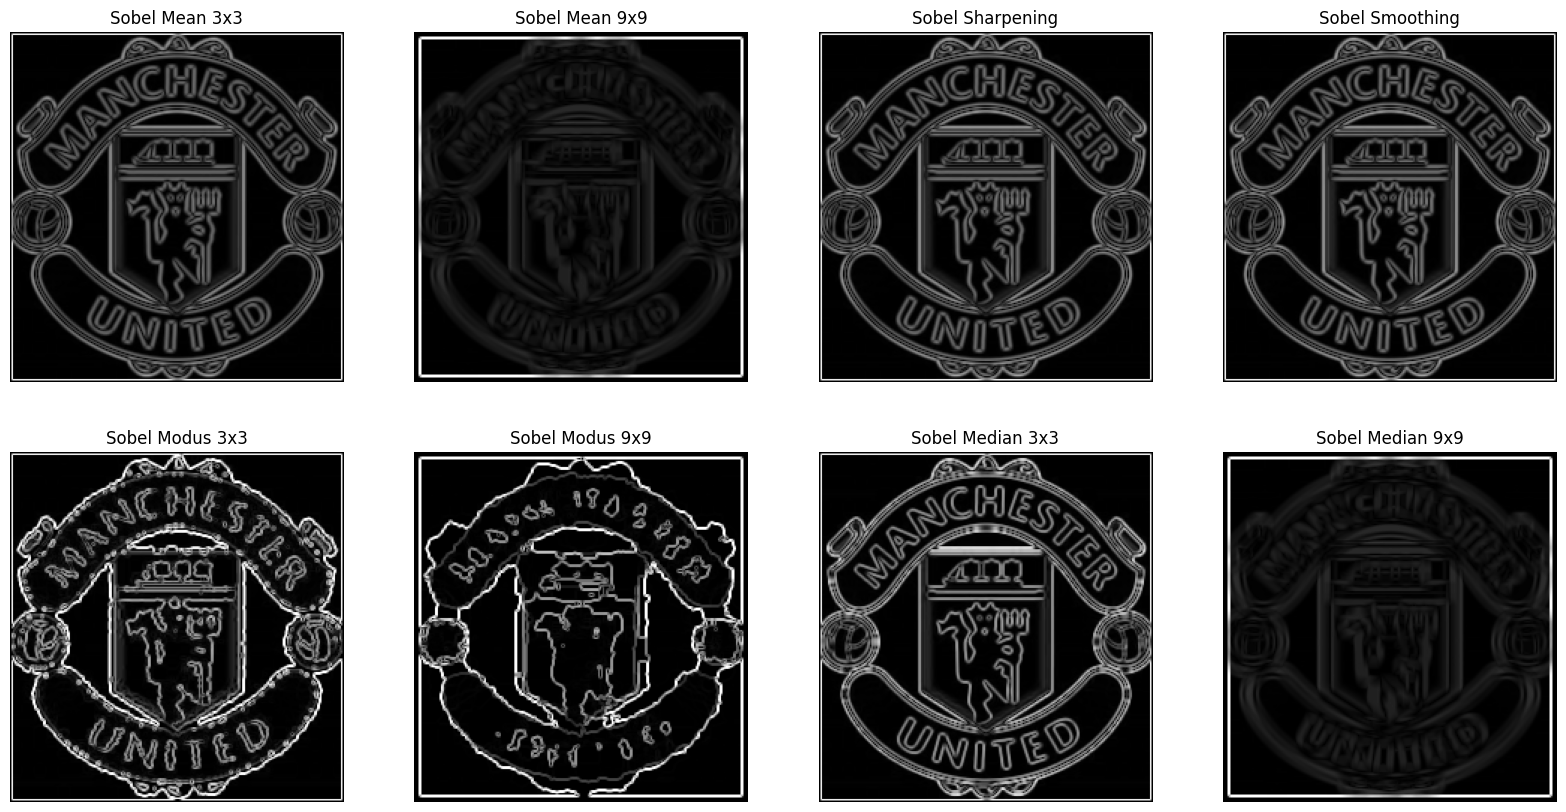

In [108]:
sobelMean3x3 = metodeSobel(hasilMean3x3)
sobelMedian3x3 = metodeSobel(hasilMedian3x3)
sobelModus3x3 = metodeSobel(hasilModus3x3)
sobelMean9x9 = metodeSobel(hasilMean9x9)
sobelMedian9x9 = metodeSobel(hasilMedian9x9)
sobelModus9x9 = metodeSobel(hasilModus9x9)
sobelSharp = metodeSobel(sharp)
sobelSmooth = metodeSobel(smooth)


plt.figure(figsize=(20,10))

plt.subplot(2, 4, 1)
plt.imshow(sobelMean3x3, cmap='gray')
plt.title('Sobel Mean 3x3')
plt.axis("off")

plt.subplot(2, 4, 2)
plt.imshow(sobelMean9x9, cmap='gray')
plt.title('Sobel Mean 9x9')
plt.axis("off")

plt.subplot(2, 4, 3)
plt.imshow(sobelSharp, cmap='gray')
plt.title('Sobel Sharpening')
plt.axis("off")

plt.subplot(2, 4, 4)
plt.imshow(sobelSmooth, cmap='gray')
plt.title('Sobel Smoothing')
plt.axis("off")

plt.subplot(2, 4, 5)
plt.imshow(sobelModus3x3, cmap='gray')
plt.title('Sobel Modus 3x3')
plt.axis("off")

plt.subplot(2, 4, 6)
plt.imshow(sobelModus9x9, cmap='gray')
plt.title('Sobel Modus 9x9')
plt.axis("off")

plt.subplot(2, 4, 7)
plt.imshow(sobelMedian3x3, cmap='gray')
plt.title('Sobel Median 3x3')
plt.axis("off")

plt.subplot(2, 4, 8)
plt.imshow(sobelMean9x9, cmap='gray')
plt.title('Sobel Median 9x9')
plt.axis("off")

plt.show()

# 3. Prewitt

In [109]:
def metodeRoberts(image):
    height, width = image.shape

    edges = np.zeros((height, width))

    roberts_horizontal = np.array([[1, 0],
                                [0, -1]])

    roberts_vertical = np.array([[0, 1],
                                [-1, 0]])

    for i in range(0, height-1):
        for j in range(0, width-1):
            horizontal_gradient = (image[i, j] * roberts_horizontal[0, 0] +
                                   image[i, j+1] * roberts_horizontal[0, 1] +
                                   image[i+1, j] * roberts_horizontal[1, 0] +
                                   image[i+1, j+1] * roberts_horizontal[1, 1])
            vertical_gradient = (image[i, j] * roberts_vertical[0, 0] +
                                 image[i, j+1] * roberts_vertical[0, 1] +
                                 image[i+1, j] * roberts_vertical[1, 0] +
                                 image[i+1, j+1] * roberts_vertical[1, 1])
            edges[i, j] = np.sqrt(horizontal_gradient**2 + vertical_gradient**2)

    return edges

Metode Roberts adalah metode sederhana yang digunakan untuk mendeteksi tepi dalam citra. Program menerima sebuah citra sebagai input dan menghasilkan citra yang menunjukkan tepi yang terdeteksi. Pertama-tama, program menginisialisasi matriks yang akan menyimpan hasil deteksi tepi dengan ukuran yang sama dengan citra input. Kemudian, program mendefinisikan kernel atau matriks Roberts untuk deteksi tepi horizontal dan vertikal. Matriks ini berukuran 2x2 dan memiliki bobot yang ditentukan sebelumnya untuk mendeteksi perubahan intensitas dalam arah horizontal dan vertikal.Selanjutnya, program melakukan iterasi melalui setiap piksel dalam citra kecuali pinggiran, dan untuk setiap piksel, program menghitung gradien tepi horizontal dan vertikal dengan mengalikan nilai piksel dan matriks Roberts secara bersesuaian. Setelah itu, program menghitung magnitudo gradien tepi dengan menggunakan akar kuadrat dari jumlah kuadrat gradien horizontal dan vertikal untuk setiap piksel. Hasilnya disimpan dalam matriks hasil deteksi tepi. Proses ini menghasilkan citra yang menyoroti garis tepi dalam citra input, di mana nilai yang lebih tinggi menunjukkan adanya perubahan intensitas yang tajam, yang sering kali menandakan adanya tepi dalam citra.

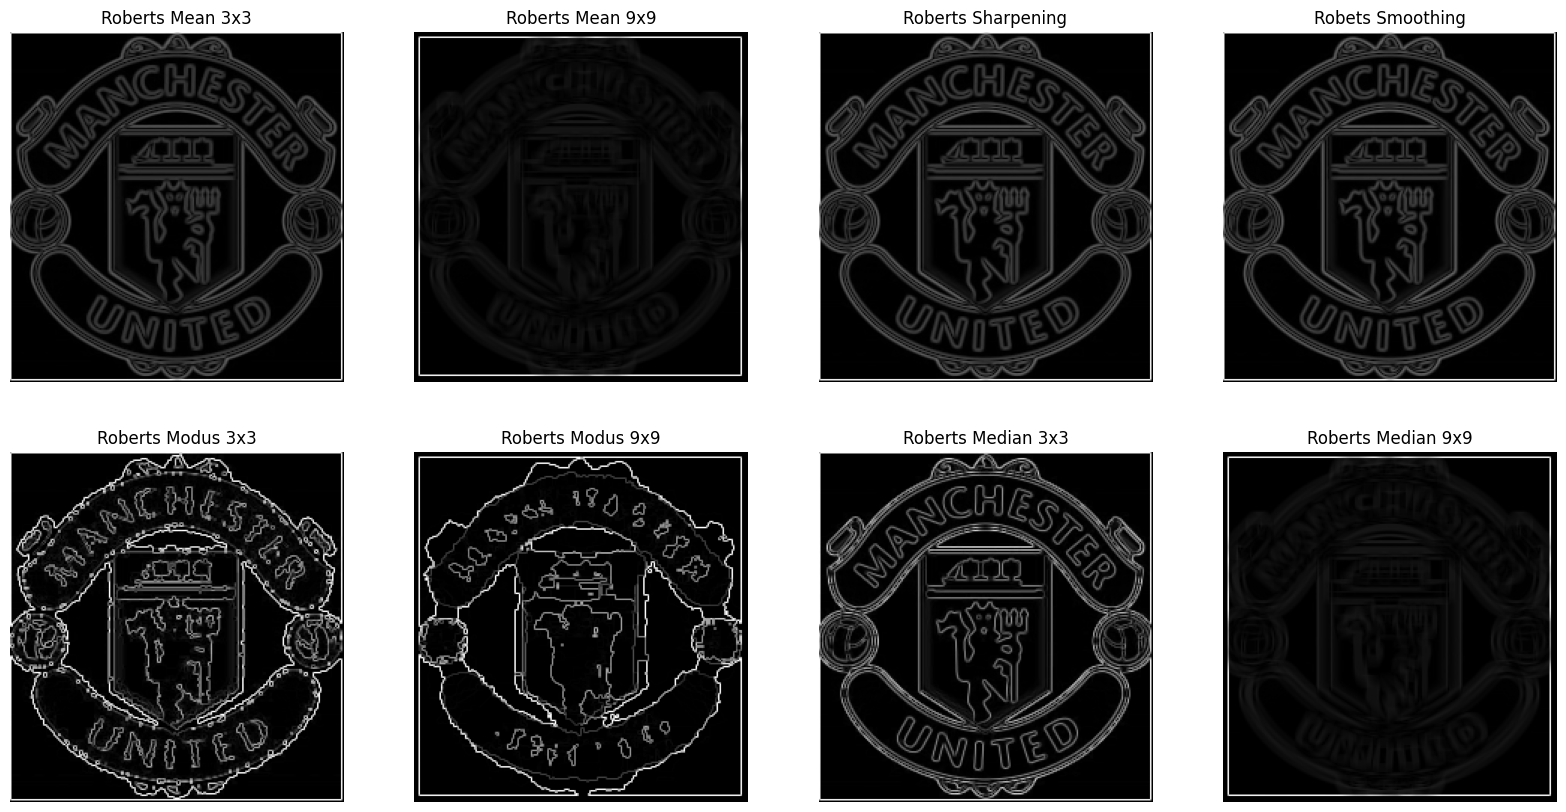

In [110]:


robertsMean3x3 = metodeRoberts(hasilMean3x3)
robertsMedian3x3 = metodeRoberts(hasilMedian3x3)
robertsModus3x3 = metodeRoberts(hasilModus3x3)
robertsMean9x9 = metodeRoberts(hasilMean9x9)
robertsMedian9x9 = metodeRoberts(hasilMedian9x9)
robertsModus9x9 = metodeRoberts(hasilModus9x9)
robertsSharp = metodeRoberts(sharp)
robertsSmooth = metodeRoberts(smooth)


plt.figure(figsize=(20,10))

plt.subplot(2, 4, 1)
plt.imshow(robertsMean3x3, cmap='gray')
plt.title('Roberts Mean 3x3')
plt.axis("off")

plt.subplot(2, 4, 2)
plt.imshow(robertsMean9x9, cmap='gray')
plt.title('Roberts Mean 9x9')
plt.axis("off")

plt.subplot(2, 4, 3)
plt.imshow(robertsSharp, cmap='gray')
plt.title('Roberts Sharpening')
plt.axis("off")

plt.subplot(2, 4, 4)
plt.imshow(robertsSmooth, cmap='gray')
plt.title('Robets Smoothing')
plt.axis("off")

plt.subplot(2, 4, 5)
plt.imshow(robertsModus3x3, cmap='gray')
plt.title('Roberts Modus 3x3')
plt.axis("off")

plt.subplot(2, 4, 6)
plt.imshow(robertsModus9x9, cmap='gray')
plt.title('Roberts Modus 9x9')
plt.axis("off")

plt.subplot(2, 4, 7)
plt.imshow(robertsMedian3x3, cmap='gray')
plt.title('Roberts Median 3x3')
plt.axis("off")

plt.subplot(2, 4, 8)
plt.imshow(robertsMean9x9, cmap='gray')
plt.title('Roberts Median 9x9')
plt.axis("off")

plt.show()